In [1]:
# Import the Libraries

import pandas as pd
import os
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the iris dataset
data = pd.read_csv("iris.csv")

In [3]:
# Checking the contents of the iris dataset
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Using label encoder to convert string to numeric values for the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [5]:
# Converting imput to numpy array
np_data = data.to_numpy()

In [6]:
# Define feature and target variable
X_data = np_data[:, 0:4]
y_data = np_data[:,4]

In [7]:
print(X_data[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
print(y_data[:5])

[0. 0. 0. 0. 0.]


In [9]:
# Scaling the data
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

In [10]:
# Convert target variable as a one-hot-encoding array
y_data = tf.keras.utils.to_categorical(y_data,3)

In [11]:
print(X_data[:5,:])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [12]:
print(y_data[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [13]:
# Spliting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [14]:
# Checking the shape of the train and test data

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [15]:
# Building the model

from tensorflow import keras

# number of classes in the target variable
n_classes = 3

# Create a sequential model in Keras
model = tf.keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(128,                       # number of nodes
                             input_shape = (4,),        # number of input variables
                             name = 'Hidden-Layer-1',   # logical name
                             activation = 'relu'))      # activation function

# Add a second hidden layer
model.add(keras.layers.Dense(128,                       # number of nodes
                             name = 'Hidden-Layer-2',   # logical name
                             activation = 'relu'))      # activation function

# Add output layer
model.add(keras.layers.Dense(n_classes,
                             name = 'Output-Layer',
                             activation = 'softmax'))

In [16]:
# Compile the model 
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Training and evaluating the model
# To see the progress
VERBOSE = 1

# setup hyperparameter for training

# set batch size
BATCH_SIZE = 16

# set number of epochs
EPOCHS = 10

# set validation split. 20% of the training data will be used for validation after each epoch
VALIDATION_SPILT = 0.2

# fit the model. This will perform the entire training cycle, including forward propagation. loass computation, backward 
# propagation and gradient descent.
# Execute for the specified batch size and epoch
# perform validation after each epoch

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS,
                   verbose=VERBOSE,
                   validation_split=VALIDATION_SPILT)

Epoch 1/10
6/6 [==============================] - 1s 51ms/step - loss: 0.8342 - accuracy: 0.6562 - val_loss: 0.6423 - val_accuracy: 0.7917
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 0.5543 - accuracy: 0.7604 - val_loss: 0.4988 - val_accuracy: 0.8333
Epoch 3/10
6/6 [==============================] - 0s 10ms/step - loss: 0.4478 - accuracy: 0.8125 - val_loss: 0.4099 - val_accuracy: 0.9167
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 0.3869 - accuracy: 0.8229 - val_loss: 0.3455 - val_accuracy: 0.9167
Epoch 5/10
6/6 [==============================] - 0s 10ms/step - loss: 0.3458 - accuracy: 0.8542 - val_loss: 0.3045 - val_accuracy: 0.9167
Epoch 6/10
6/6 [==============================] - 0s 13ms/step - loss: 0.3117 - accuracy: 0.8646 - val_loss: 0.2573 - val_accuracy: 0.9583
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.2860 - accuracy: 0.8854 - val_loss: 0.2269 - val_accuracy: 0.9583
Epoch 8/10
6/6 [===========

In [18]:
import matplotlib.pyplot as plt

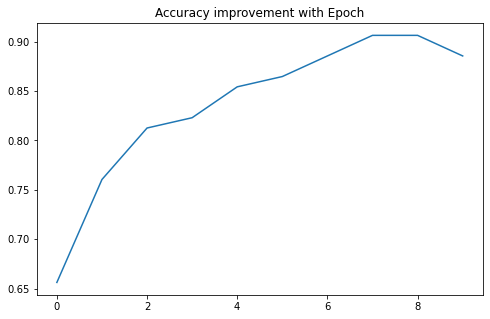

In [19]:
# Plot accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize = (8,5))
plt.title('Accuracy improvement with Epoch')
plt.show()

In [20]:
# Evaluate the model against the test dataset
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 33ms/step - loss: 0.3659 - accuracy: 0.7667


[0.365898996591568, 0.7666666507720947]

In [21]:
# Saving and Loading model

model.save('iris_save')

loaded_model = keras.models.load_model('iris_save')

loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Prediction 

# Raw prediction data
prediction_input = [[6.6, 3., 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = sc.transform(prediction_input)

# Get raw prediction 
raw_prediction = model.predict(scaled_input)
print("Raw Prediction output: ", raw_prediction)

# prediction
prediction = np.argmax(raw_prediction)
print("Prediction is", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 84ms/step
Raw Prediction output:  [[0.02298443 0.5839853  0.39303026]]
Prediction is ['versicolor']
